# Memory Advantage in the QEMC Algorithm? Notebook 2

**Ohad Lev**

**September 2023**

We make use of the same function that generates a graph strucure "on the fly" as in the previous notebook:

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 0), (7, 0), (7, 1)]


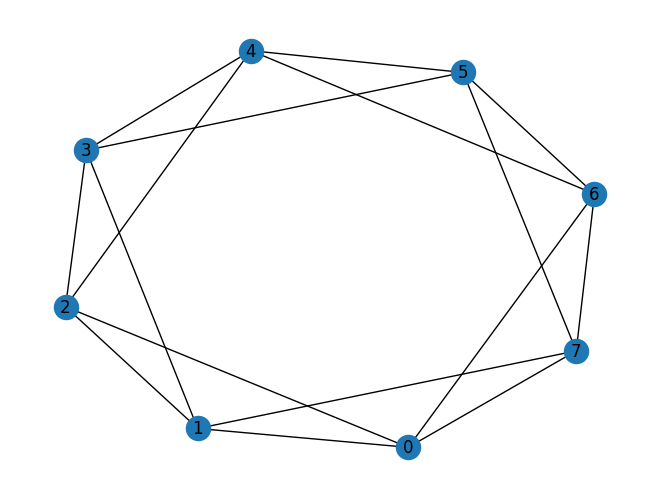

In [1]:
import networkx as nx


def edges_generator(node_index, num_nodes):

    gen_edges = []
    gen_edges.append((node_index, (node_index + 1) % num_nodes))
    gen_edges.append((node_index, (node_index + 2) % num_nodes))
    
    return gen_edges


num_nodes = 8

edges = []
for index in range(num_nodes):
    edges += edges_generator(index, num_nodes)

graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)

print(edges)

Let's write again the cost function of the QEMC algorithm:

$$ C(G) = \sum^{}_{i < j} \Bigg( p_i + p_j - \frac{1}{B} \Bigg)^2 + \Bigg( |p_i - p_j| - \frac{1}{B} \Bigg)^2 $$

But now, on the contrary to notebook 1, we assign the rest of $N - B$ nodes (of which we do not save the probabilities for) with an average residual probability of $\frac{1 - P}{N - B}$ each, where $P$ is the sum of probabilities associated with the $B$ mose probable nodes.

### Brute-Force MaxCut

In [2]:
# Brute Force

from classical_functions import brute_force_maxcut


bfmc = brute_force_maxcut(graph)

print(bfmc.optimal_partitions)
print(bfmc.best_score)

{'00110011', '10011001', '01100110', '11001100'}
12


### MaxCut approximation by the original QEMC

In [3]:
# Origianl QEMC

from qemc_implementation import QEMC


qemc_int = QEMC(graph)
qemc_int.construct_ansatz(6)
qemc_int.run()

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.4014892578125
       x: [ 1.011e+00  5.916e+00 ...  1.668e+00  2.430e+00]
    nfev: 501
   maxcv: 0.0, best_counts={'100': 31, '111': 19, '011': 59, '000': 113, '010': 313, '110': 150, '001': 162, '101': 177}, best_params=array([0.98943532, 5.93476685, 0.67184862, 6.40677954, 6.121481  ,
       1.93973598, 1.00846885, 2.31650743, 3.01888637, 2.10531211,
       3.27229038, 4.72053617, 4.65232617, 3.55692447, 5.21725391,
       1.94995994, 0.20372732, 0.80528683, 0.38942018, 1.97084005,
       1.20907251, 2.97692648, 3.87978461, 0.29370056, 1.05533585,
       3.68371541, 3.6876733 , 2.62479181, 4.22466254, 4.65347084,
       5.7101838 , 4.78793257, 4.33460024, 1.16264983, 3.43514183,
       6.14258597, 5.3428482 , 5.40452506, 1.11528237, 6.24346537,
       1.12235665, 0.50553869, 5.82112091, 4.34176398, 1.27610767,
       0.37650393, 3.322081  , 0.4951879 , 0.51833133, 3.760

Achieved an optimal partition.

### Modified QEMC to test possible memory advantage

In [4]:
# Setting memory limitation to B = 4, 1024 shots

from qemc_memory_adv_implementation import QEMC_ML

qemc_ml_int = QEMC_ML(graph)
qemc_ml_int.construct_ansatz(6)
qemc_ml_int.run(memory_limitation=4)

{'111': 0.2724609375, '011': 0.2099609375, '001': 0.1884765625, '110': 0.162109375, '000': 0.041748046875, '101': 0.041748046875, '100': 0.041748046875, '010': 0.041748046875}


QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.5304718017578125
       x: [ 3.341e+00  4.307e+00 ...  5.117e+00  1.499e-01]
    nfev: 499
   maxcv: 0.0, best_counts={'111': 0.2724609375, '011': 0.2099609375, '001': 0.1884765625, '110': 0.162109375, '000': 0.041748046875, '101': 0.041748046875, '100': 0.041748046875, '010': 0.041748046875}, best_params=array([3.33719473, 4.31279082, 6.09223558, 1.7631417 , 0.86469763,
       3.90258429, 0.75002906, 5.51158053, 1.70379093, 1.16186304,
       2.35966885, 3.20732984, 1.40411485, 6.09136912, 0.71131428,
       5.81091991, 1.46032473, 3.1198074 , 1.83194042, 4.15701019,
       2.24115535, 0.79368155, 1.59660013, 1.48369865, 1.28110194,
       1.07947157, 2.75951113, 3.4639289 , 3.4451376 , 4.34426963,
       4.52995366, 3.44932585, 3.32366834, 0.85307229, 6.27400952,
       4.51021868, 3.69850022, 2.93876199, 3.92658321, 4.03690234,
       1.48146687, 4.01921259, 4.22239568,

----------

## Larger Graph-Instance

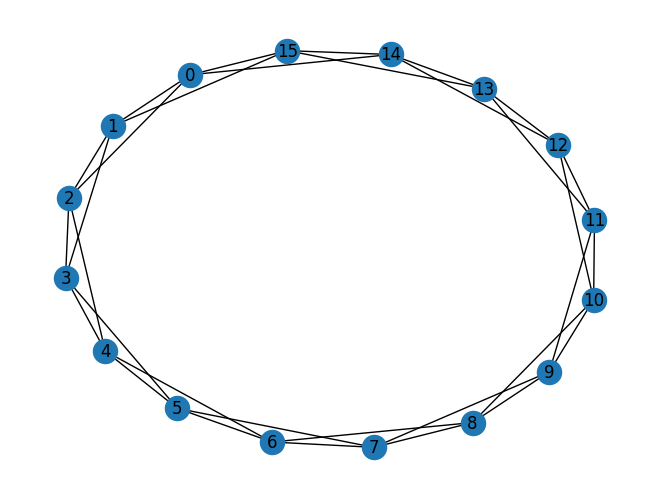

In [5]:
num_nodes = 16

edges = []
for i in range(num_nodes):
    edges += edges_generator(i, num_nodes)
    
graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)

In [6]:
bfmc = brute_force_maxcut(graph)

print(bfmc.optimal_partitions)
print(bfmc.best_score)

{'1001100110011001', '1100110011001100', '0110011001100110', '0011001100110011'}
24


In [15]:
qemc_int = QEMC(graph)
qemc_int.construct_ansatz(6)
qemc_org_version_res = qemc_int.run()
qemc_org_version_res

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.2194671630859375
       x: [ 2.359e+00  5.770e+00 ...  5.359e+00  2.937e+00]
    nfev: 654
   maxcv: 0.0, best_counts={'0001': 15, '1100': 5, '0010': 25, '1011': 91, '0011': 83, '0111': 124, '1111': 157, '0000': 54, '1010': 106, '1101': 23, '1000': 63, '0110': 41, '1110': 136, '1001': 23, '0101': 7, '0100': 71}, best_params=array([2.25072321, 5.75619881, 5.76723523, 4.59064308, 2.30246485,
       4.10860604, 3.91398967, 1.95880213, 5.92412548, 0.15125947,
       0.17388095, 2.41512753, 1.73100936, 4.40440314, 4.97477595,
       3.48226003, 3.7741127 , 1.13148909, 0.53347787, 4.18008716,
       2.36713911, 2.57583599, 1.90312991, 4.36190345, 5.00718026,
       1.70420457, 6.27262614, 4.30737185, 5.85858229, 2.65275335,
       5.24047639, 1.91442168, 2.16273903, 3.80186387, 6.01152485,
       0.90838576, 2.68084304, 4.54098162, 1.72158034, 0.26879815,
       0.35534334, 4.96

Memory limit version:

In [18]:
qemc_ml_int = QEMC_ML(graph)
qemc_ml_int.construct_ansatz(6)
qemc_ml_version_res = qemc_ml_int.run(memory_limitation=8)
qemc_ml_version_res

{'0100': 0.15234375, '1101': 0.150390625, '0001': 0.1220703125, '0000': 0.09375, '1100': 0.0732421875, '0011': 0.0693359375, '1001': 0.068359375, '0111': 0.0673828125, '1011': 0.025390625, '1111': 0.025390625, '0110': 0.025390625, '1000': 0.025390625, '1110': 0.025390625, '0101': 0.025390625, '1010': 0.025390625, '0010': 0.025390625}


QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.26184940338134766
       x: [ 5.440e+00  2.616e+00 ...  3.419e+00  5.046e+00]
    nfev: 608
   maxcv: 0.0, best_counts={'0100': 0.15234375, '1101': 0.150390625, '0001': 0.1220703125, '0000': 0.09375, '1100': 0.0732421875, '0011': 0.0693359375, '1001': 0.068359375, '0111': 0.0673828125, '1011': 0.025390625, '1111': 0.025390625, '0110': 0.025390625, '1000': 0.025390625, '1110': 0.025390625, '0101': 0.025390625, '1010': 0.025390625, '0010': 0.025390625}, best_params=array([5.44127341, 2.62054895, 4.02633296, 1.41463595, 4.3823547 ,
       5.46820033, 5.26942328, 3.22027462, 4.08573724, 5.67202741,
       3.97397933, 1.86773334, 4.51473562, 2.93624934, 0.89010937,
       6.21851834, 3.5375572 , 5.14854798, 6.04044745, 4.61252893,
       2.43017395, 3.83590081, 2.80862107, 5.95826428, 3.24842907,
       3.48431621, 3.46721471, 2.11764946, 1.09947595, 5.70222772,
       1.773870

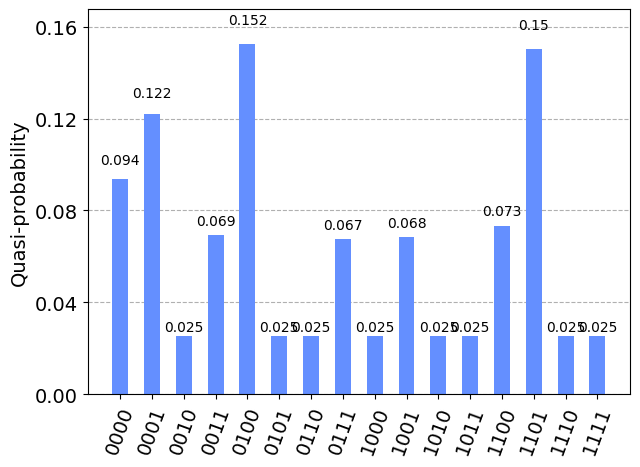

In [19]:
from qiskit.visualization import plot_distribution

plot_distribution(qemc_ml_version_res.best_counts)

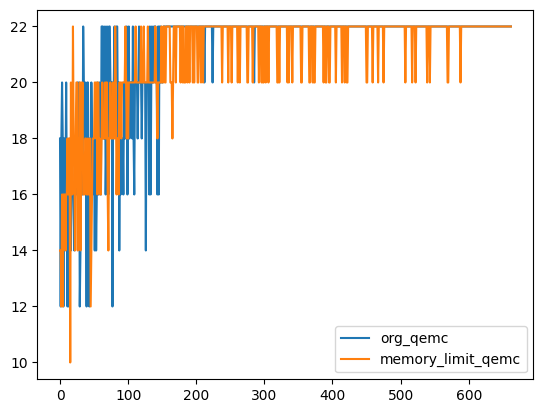

In [20]:
import numpy as np
import matplotlib.pyplot as plt


qemc_iters = len(qemc_int.cut_scores)
qemc_ml_iters = len(qemc_ml_int.cut_scores)
iters_diff = np.abs(qemc_iters - qemc_ml_iters)
x = range(max(qemc_iters, qemc_ml_iters))

if qemc_iters > qemc_ml_iters:
    qemc_ml_int.cut_scores.extend(
        [qemc_ml_int.cut_scores[-1] for _ in range(iters_diff)]
    )
else:
    qemc_int.cut_scores.extend(
        [qemc_int.cut_scores[-1] for _ in range(iters_diff)]
    )


plt.plot(x, qemc_int.cut_scores, label="org_qemc")
plt.plot(x, qemc_ml_int.cut_scores, label="memory_limit_qemc")

plt.legend()

----------------

## Larger (brute-force intractable) instances

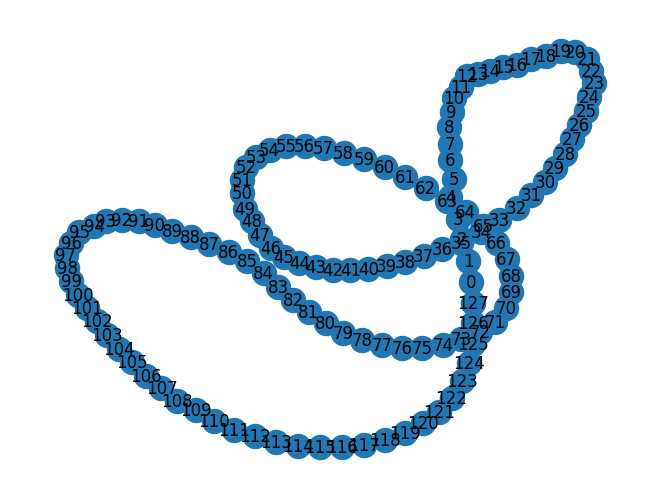

In [21]:
num_nodes = 128

edges = []
for i in range(num_nodes):
    edges += edges_generator(i, num_nodes)
    
graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)

In [29]:
qemc_int = QEMC(graph)
qemc_int.construct_ansatz(10)
qemc_org_version_res = qemc_int.run()
qemc_org_version_res

QEMCResult(optimizer_result= message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.0405120849609375
       x: [ 2.919e+00  6.752e+00 ...  3.769e+00  3.461e+00]
    nfev: 1000
   maxcv: 0.0, best_counts={'0001101': 1, '1000000': 1, '0001001': 6, '0000111': 2, '0111111': 1, '0101101': 1, '0110111': 3, '0111110': 5, '0111101': 10, '1010000': 3, '1001010': 3, '0001000': 12, '1001001': 2, '0101110': 15, '0110000': 4, '1100101': 3, '1100010': 11, '1101101': 11, '1110000': 2, '0100100': 6, '1011110': 7, '1001011': 14, '0011001': 4, '0101000': 5, '0111011': 1, '0011000': 4, '0001011': 4, '1110111': 2, '0101011': 8, '1010010': 3, '0100011': 12, '0110110': 8, '1111011': 11, '0010110': 3, '1010110': 3, '1010011': 14, '0100000': 11, '0100110': 11, '1111111': 4, '1000010': 18, '1111100': 6, '1101011': 14, '0010000': 15, '1011001': 5, '1101000': 5, '1010101': 2, '1000111': 5, '1010100': 21, '0100111': 6, '0000100': 24, '1000100': 3, '1111010': 4, 

Memory limit version:

In [30]:
qemc_ml_int = QEMC_ML(graph)
qemc_ml_int.construct_ansatz(10)
qemc_ml_version_res = qemc_ml_int.run(memory_limitation=num_nodes / 2)
qemc_ml_version_res

{'1010111': 0.03125, '1101110': 0.0302734375, '0011101': 0.025390625, '1110001': 0.0234375, '0100101': 0.01953125, '1001100': 0.0185546875, '1101000': 0.0185546875, '1010001': 0.017578125, '1111110': 0.0166015625, '1000111': 0.0166015625, '0000010': 0.0166015625, '0110001': 0.0166015625, '1100000': 0.015625, '1111101': 0.0146484375, '1011111': 0.0146484375, '1100110': 0.0146484375, '0100000': 0.0146484375, '1111001': 0.0146484375, '0100010': 0.0146484375, '1100100': 0.0146484375, '0001101': 0.013671875, '1110100': 0.013671875, '0110010': 0.013671875, '0000110': 0.0126953125, '0010111': 0.0126953125, '0100001': 0.0126953125, '1000101': 0.01171875, '0011001': 0.01171875, '1001001': 0.01171875, '0011110': 0.01171875, '1111010': 0.01171875, '0111001': 0.01171875, '0011010': 0.01171875, '1100011': 0.0107421875, '1010011': 0.0107421875, '1011101': 0.0107421875, '0100110': 0.0107421875, '0011011': 0.009765625, '0010000': 0.009765625, '1100001': 0.009765625, '0111011': 0.009765625, '0001110': 

QEMCResult(optimizer_result= message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.04253649525344372
       x: [ 1.511e+00  6.188e+00 ...  2.915e+00  3.649e+00]
    nfev: 1000
   maxcv: 0.0, best_counts={'1010111': 0.03125, '1101110': 0.0302734375, '0011101': 0.025390625, '1110001': 0.0234375, '0100101': 0.01953125, '1001100': 0.0185546875, '1101000': 0.0185546875, '1010001': 0.017578125, '1111110': 0.0166015625, '1000111': 0.0166015625, '0000010': 0.0166015625, '0110001': 0.0166015625, '1100000': 0.015625, '1111101': 0.0146484375, '1011111': 0.0146484375, '1100110': 0.0146484375, '0100000': 0.0146484375, '1111001': 0.0146484375, '0100010': 0.0146484375, '1100100': 0.0146484375, '0001101': 0.013671875, '1110100': 0.013671875, '0110010': 0.013671875, '0000110': 0.0126953125, '0010111': 0.0126953125, '0100001': 0.0126953125, '1000101': 0.01171875, '0011001': 0.01171875, '1001001': 0.01171875, '0011110': 0.01171875, '1111010': 0.0117187

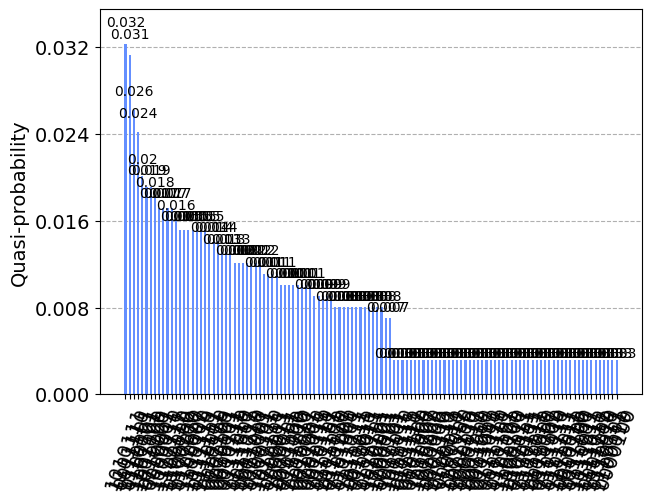

In [31]:
plot_distribution(qemc_ml_version_res.best_counts, sort="value_desc")

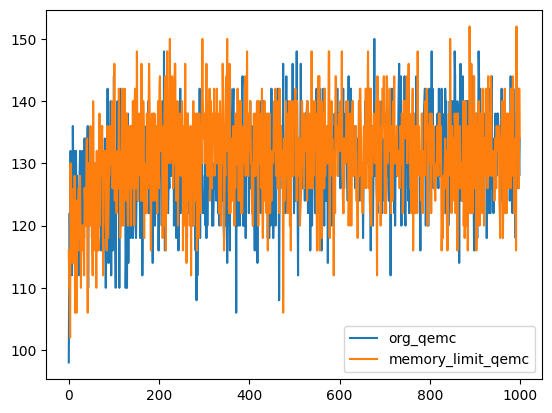

In [32]:
qemc_iters = len(qemc_int.cut_scores)
qemc_ml_iters = len(qemc_ml_int.cut_scores)
iters_diff = np.abs(qemc_iters - qemc_ml_iters)
x = range(max(qemc_iters, qemc_ml_iters))

if qemc_iters > qemc_ml_iters:
    qemc_ml_int.cut_scores.extend(
        [qemc_ml_int.cut_scores[-1] for _ in range(iters_diff)]
    )
else:
    qemc_int.cut_scores.extend(
        [qemc_int.cut_scores[-1] for _ in range(iters_diff)]
    )


plt.plot(x, qemc_int.cut_scores, label="org_qemc")
plt.plot(x, qemc_ml_int.cut_scores, label="memory_limit_qemc")

plt.legend()

In [33]:
len(graph.edges)

256